# Projet

In [548]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
from pandas.plotting import scatter_matrix
from datetime import date
from sklearn import preprocessing
df = pd.read_excel('AgencyDataset.xlsx')
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


# Check Correlations

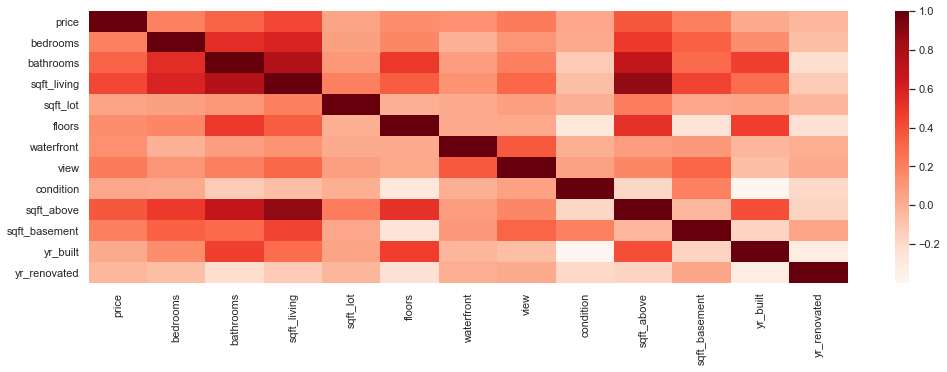

In [40]:
fig, ax = plt.subplots(figsize=(17,5))
sns.set(rc = {'figure.figsize':(10,4)})
sns.heatmap(df.corr(),cmap='Reds',ax=ax)
plt.show()

In [33]:
df.corr()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_basement,statezip,renov_age
price,1.000000,0.282659,0.536550,0.125893,0.457038,0.170250,0.447806,0.105593,0.395107,-0.034063,-0.021372
bedrooms,0.282659,1.000000,0.498738,0.191150,0.177104,-0.016908,0.123568,0.032934,0.470689,-0.119759,-0.073013
bathrooms,0.536550,0.498738,1.000000,0.219425,0.513595,0.104543,0.276090,-0.053859,0.430096,-0.171004,-0.194041
sqft_lot,0.125893,0.191150,0.219425,1.000000,-0.093500,0.121912,0.145656,-0.048318,0.310172,-0.369130,-0.101762
floors,0.457038,0.177104,0.513595,-0.093500,1.000000,0.047757,0.189311,-0.086561,-0.017915,0.060571,-0.117437
waterfront,0.170250,-0.016908,0.104543,0.121912,0.047757,1.000000,0.297147,-0.020146,0.113538,0.007232,0.018406
view,0.447806,0.123568,0.276090,0.145656,0.189311,0.297147,1.000000,0.029907,0.293284,0.089392,0.014801
condition,0.105593,0.032934,-0.053859,-0.048318,-0.086561,-0.020146,0.029907,1.000000,0.119208,0.033858,-0.245956
sqft_basement,0.395107,0.470689,0.430096,0.310172,-0.017915,0.113538,0.293284,0.119208,1.000000,-0.143442,-0.083559
statezip,-0.034063,-0.119759,-0.171004,-0.369130,0.060571,0.007232,0.089392,0.033858,-0.143442,1.000000,0.210638


# Get to know more about columns

In [3]:
print(df.describe())
print("null values : ",df.isna().sum())

              price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
mean   5.519630e+05     3.400870     2.160815   2139.346957  1.485252e+04   
std    5.638347e+05     0.908848     0.783781    963.206916  3.588444e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.228750e+05     3.000000     1.750000   1460.000000  5.000750e+03   
50%    4.609435e+05     3.000000     2.250000   1980.000000  7.683000e+03   
75%    6.549625e+05     4.000000     2.500000   2620.000000  1.100125e+04   
max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   

            floors   waterfront         view    condition   sqft_above  \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
mean      1.512065     0.007174     0.240652     3.451739  1827.265435   
std       0.538288     0.084404     0.778405     0.677230   862.168977   
min       

# Columns Types

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   float64       
 2   bedrooms       4600 non-null   int64         
 3   bathrooms      4600 non-null   float64       
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   float64       
 7   waterfront     4600 non-null   int64         
 8   view           4600 non-null   int64         
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
 14  street         4600 non-null   object        
 15  city           4600 n

# Feature Engineering

# Detect Duplicates

In [549]:
col_names = ["price","street","city","statezip"]
duplicates = df.duplicated(subset=col_names, keep=False)
df[duplicates]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
2271,2014-06-10,399950.0,2,1.0,710,1157,2.0,0,0,4,710,0,1943,0,2358 Fairview Ave E,Seattle,WA 98102,USA
2350,2014-06-11,399950.0,2,1.0,710,1131,2.0,0,0,4,710,0,1943,0,2358 Fairview Ave E,Seattle,WA 98102,USA


# Duplicates Removal

In [550]:
df= df.drop_duplicates(subset=col_names)
df[duplicates]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
2271,2014-06-10,399950.0,2,1.0,710,1157,2.0,0,0,4,710,0,1943,0,2358 Fairview Ave E,Seattle,WA 98102,USA


# Cleaning Data

In [551]:
df.drop(df[df['bedrooms']==0].index, inplace=True)
df.drop(df[df['sqft_living']>df['sqft_lot']].index, inplace=True)
df.drop(df[df['sqft_basement']>df['sqft_lot']].index, inplace=True)
df.drop(df[df['sqft_above']>df['sqft_lot']].index, inplace=True)
df.drop(df[df['sqft_basement']==0].index, inplace=True)
df.drop(df[df['bathrooms']==0].index, inplace=True)

In [225]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
1,2014-05-02,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
3,2014-05-02,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
8,2014-05-02,452500.0,3,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
11,2014-05-02,1400000.0,4,2.50,2920,4000,1.5,0,0,5,1910,1010,1909,1988,3838-4098 44th Ave NE,Seattle,WA 98105,USA


# Delete Data where prices  ==  0 

In [552]:
df = df[df['price']!=0]

In [11]:
df.shape

(4426, 18)

# Remove extra Characters and change type to float on statezip

In [553]:
df["statezip"] = df["statezip"].str.strip("WA").astype("float64")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
1,2014-05-02,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,98119.0,USA
3,2014-05-02,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,98008.0,USA
4,2014-05-02,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,98052.0,USA
8,2014-05-02,452500.0,3,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,98045.0,USA
11,2014-05-02,1400000.0,4,2.50,2920,4000,1.5,0,0,5,1910,1010,1909,1988,3838-4098 44th Ave NE,Seattle,98105.0,USA


# Drop extra Columnns 'date', 'country' = USA, and 'street' statezip is enough

In [554]:
df.drop(['date', 'country','street'], axis = 1, inplace = True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,98119.0
3,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,98008.0
4,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,98052.0
8,452500.0,3,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,North Bend,98045.0
11,1400000.0,4,2.50,2920,4000,1.5,0,0,5,1910,1010,1909,1988,Seattle,98105.0


# Replace year built and year renovated by age_renovation

In [555]:
df['renov_age'] = np.abs(df['yr_renovated'] - df['yr_built'])
df['renov_age'] = df.renov_age.apply(lambda x: x if len(str(int(x)))==2 else 0.0)
df.drop(['yr_renovated', 'yr_built'], axis = 1, inplace = True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,statezip,renov_age
1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,Seattle,98119.0,0.0
3,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,Bellevue,98008.0,0.0
4,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,Redmond,98052.0,16.0
8,452500.0,3,2.50,2430,88426,1.0,0,0,4,1570,860,North Bend,98045.0,0.0
11,1400000.0,4,2.50,2920,4000,1.5,0,0,5,1910,1010,Seattle,98105.0,79.0


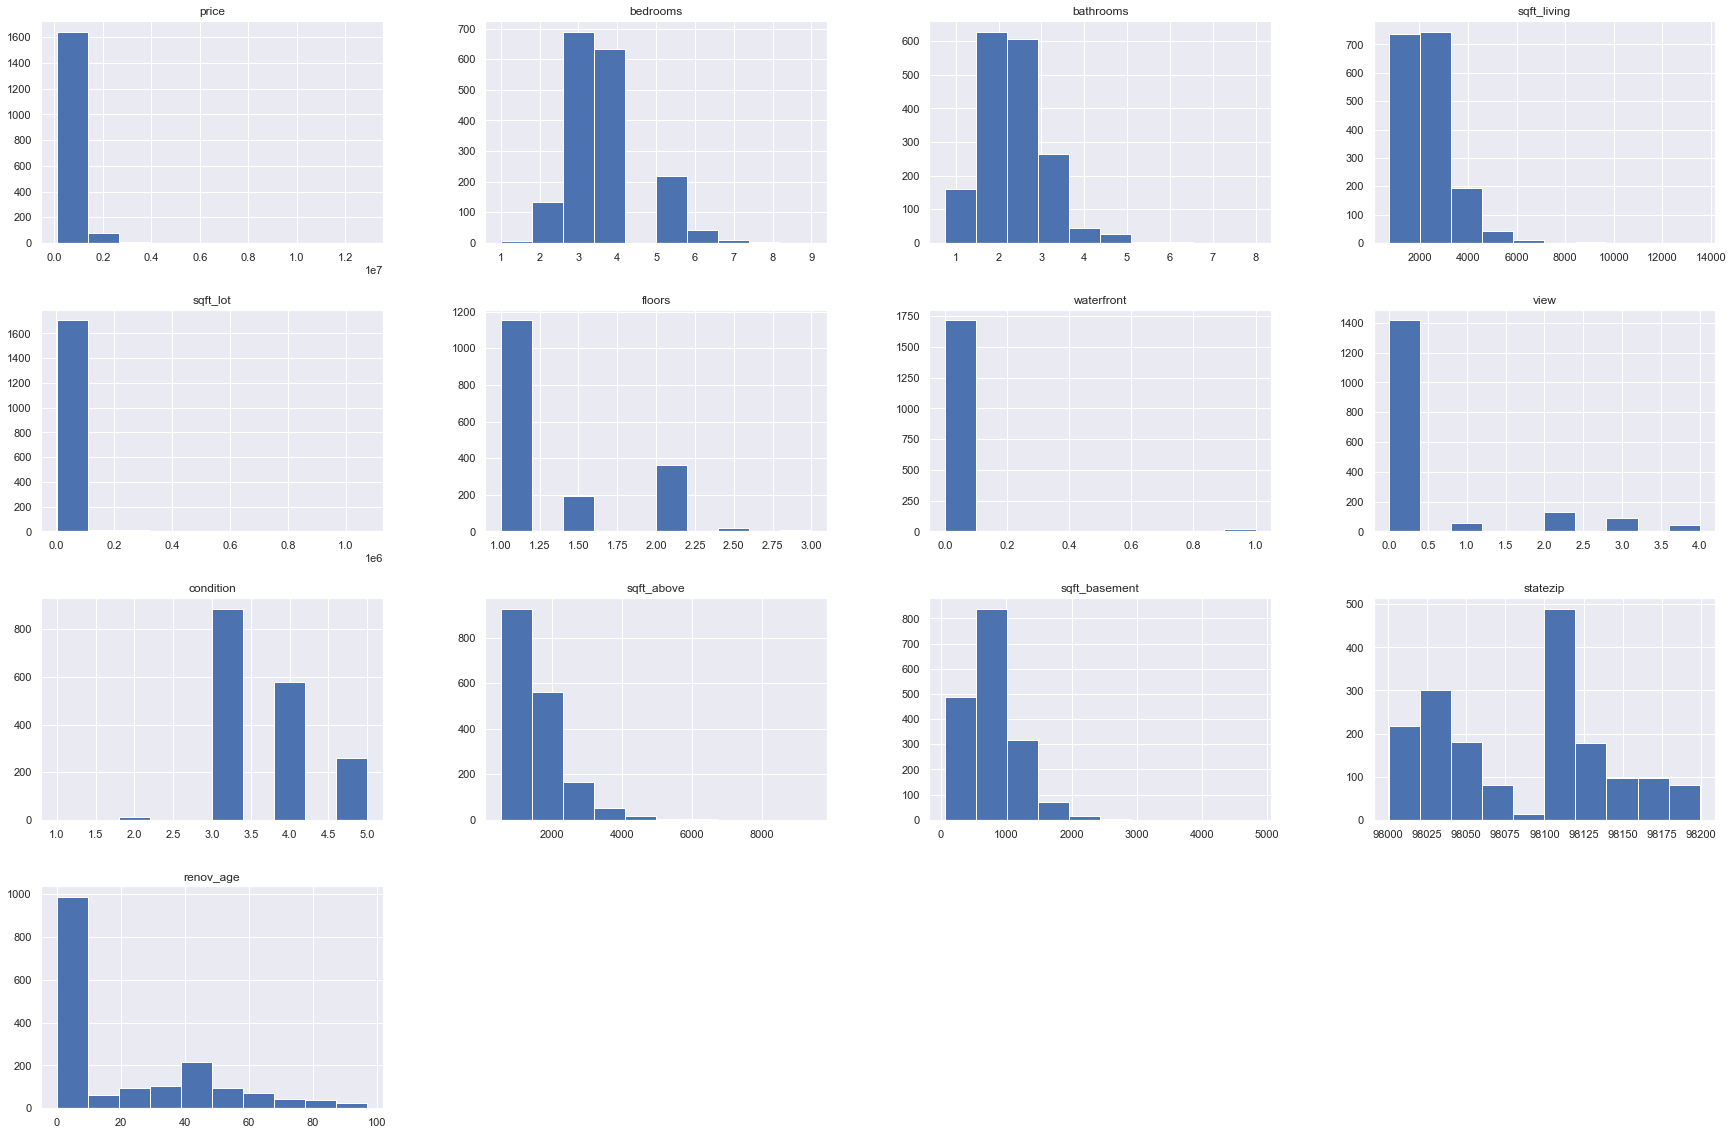

In [11]:
df.hist(figsize=(30,20))
plt.show()

In [77]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,street,city,statezip,renov_age
0,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,18810 Densmore Ave N,Shoreline,98133.0,50.0
1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,709 W Blaine St,Seattle,98119.0,0.0
2,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,26206-26214 143rd Ave SE,Kent,98042.0,0.0
3,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,857 170th Pl NE,Bellevue,98008.0,0.0
4,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,9105 170th Ave NE,Redmond,98052.0,16.0


# Remove Highly Correlated features

In [556]:
corr_features =[]

for i , r in df.corr().iterrows():
    k=0
    for j in range(len(r)):
        if i!= r.index[k]:
            if r.values[k] >=0.5:
                corr_features.append([i, r.index[k], r.values[k]])
        k += 1
corr_features

[['price', 'sqft_living', 0.5919371989349833],
 ['price', 'sqft_above', 0.5820187557633522],
 ['bedrooms', 'sqft_living', 0.512072787594829],
 ['bathrooms', 'sqft_living', 0.7498731483216637],
 ['bathrooms', 'floors', 0.5135951360268391],
 ['bathrooms', 'sqft_above', 0.7373283978255825],
 ['sqft_living', 'price', 0.5919371989349833],
 ['sqft_living', 'bedrooms', 0.512072787594829],
 ['sqft_living', 'bathrooms', 0.7498731483216637],
 ['sqft_living', 'sqft_above', 0.9293667795425605],
 ['sqft_living', 'sqft_basement', 0.722244504352609],
 ['floors', 'bathrooms', 0.5135951360268391],
 ['floors', 'sqft_above', 0.6095086073260852],
 ['sqft_above', 'price', 0.5820187557633522],
 ['sqft_above', 'bathrooms', 0.7373283978255825],
 ['sqft_above', 'sqft_living', 0.9293667795425605],
 ['sqft_above', 'floors', 0.6095086073260852],
 ['sqft_basement', 'sqft_living', 0.722244504352609]]

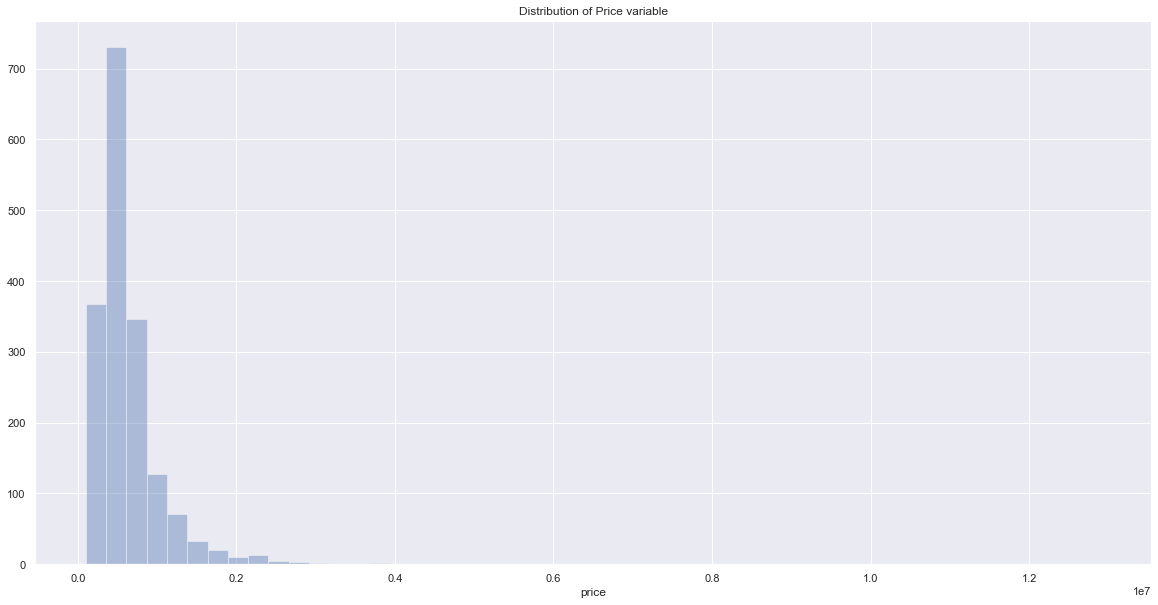

In [557]:
feat =[]
for i in corr_features:
    if i[2] >= 0.8:
        feat.append(i[0])
        feat.append(i[1])
        
df.drop(list(set(feat)), axis=1, inplace=True)
df.head()
plt.figure(figsize=(20,10))
sns.distplot(df['price'], kde=False).set_title('Distribution of Price variable')
plt.show()

In [558]:
dff = df.copy()
dff.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_basement,city,statezip,renov_age
1,2384000.0,5,2.50,9050,2.0,0,4,5,280,Seattle,98119.0,0.0
3,420000.0,3,2.25,8030,1.0,0,0,4,1000,Bellevue,98008.0,0.0
4,550000.0,4,2.50,10500,1.0,0,0,4,800,Redmond,98052.0,16.0
8,452500.0,3,2.50,88426,1.0,0,0,4,860,North Bend,98045.0,0.0
11,1400000.0,4,2.50,4000,1.5,0,0,5,1010,Seattle,98105.0,79.0


# Outliers Detection and removal (cap)

lower outliers of price:  0
upper outliers of price :  116
After Capping ..


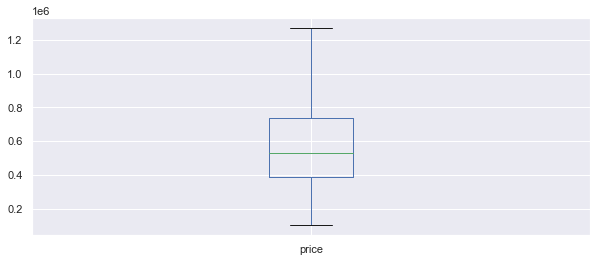

lower outliers of sqft_lot:  0
upper outliers of sqft_lot :  183
After Capping ..


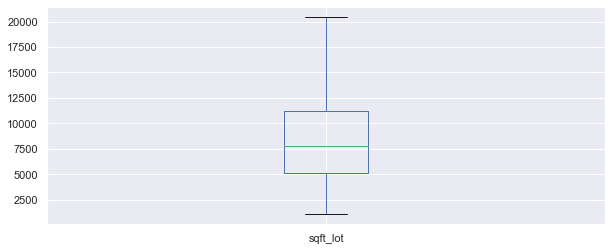

lower outliers of sqft_basement:  0
upper outliers of sqft_basement :  40
After Capping ..


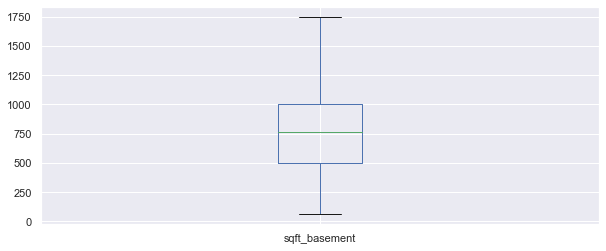

In [559]:
def get_outliers(df):
    for i in df[['price','sqft_lot','sqft_basement']]:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - iqr*1.5
        upper = q3 + iqr*1.5
        outliers = [df[df[i]<lower] | df[df[i]>upper]]
        #len(outliers[0])
        
        print(f"lower outliers of {i}: ",df[df[i]<lower].count()[0])
        print(f"upper outliers of {i} : ",df[df[i]>upper].count()[0])
        print("After Capping ..")
       
        df[i] = np.where(df[i]> upper, upper,
                        np.where(df[i]< lower, lower,
                          df[i]))
        #df = df[(df['price']<upper) & (df['price']>lower)]
        df[i].plot(kind='box');
        plt.show()
get_outliers(dff)

In [533]:
dff.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_basement,city,statezip,renov_age
1,1272500.0,5,2.50,9050.0,2.0,0,4,5,280.0,Seattle,98119.0,0.0
3,420000.0,3,2.25,8030.0,1.0,0,0,4,1000.0,Bellevue,98008.0,0.0
4,550000.0,4,2.50,10500.0,1.0,0,0,4,800.0,Redmond,98052.0,16.0
8,452500.0,3,2.50,20477.0,1.0,0,0,4,860.0,North Bend,98045.0,0.0
11,1272500.0,4,2.50,4000.0,1.5,0,0,5,1010.0,Seattle,98105.0,79.0


# Getting most frequent Cities

C:\Users\rouka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Seattle'),
 Text(1, 0, 'Bellevue'),
 Text(2, 0, 'Redmond'),
 Text(3, 0, 'North Bend'),
 Text(4, 0, 'Sammamish'),
 Text(5, 0, 'Federal Way'),
 Text(6, 0, 'Kirkland'),
 Text(7, 0, 'Woodinville'),
 Text(8, 0, 'Auburn'),
 Text(9, 0, 'Maple Valley'),
 Text(10, 0, 'Normandy Park'),
 Text(11, 0, 'Bothell'),
 Text(12, 0, 'Renton'),
 Text(13, 0, 'Issaquah'),
 Text(14, 0, 'Shoreline'),
 Text(15, 0, 'Des Moines'),
 Text(16, 0, 'Covington'),
 Text(17, 0, 'Burien'),
 Text(18, 0, 'Kenmore'),
 Text(19, 0, 'Kent'),
 Text(20, 0, 'Carnation'),
 Text(21, 0, 'Clyde Hill'),
 Text(22, 0, 'Mercer Island'),
 Text(23, 0, 'Duvall'),
 Text(24, 0, 'Lake Forest Park'),
 Text(25, 0, 'Fall City'),
 Text(26, 0, 'SeaTac'),
 Text(27, 0, 'Snoqualmie'),
 Text(28, 0, 'Newcastle'),
 Text(29, 0, 'Medina'),
 Text(30, 0, 'Snoqualmie Pass'),
 Text(31, 0, 'Enumclaw'),
 Text(32, 0, 'Tukwila'),
 Text(33, 0, 'Vashon'),
 Text(34, 0, 'Beaux Arts Village'),
 Text(35, 0, 'Preston'),
 Text(36, 0, 'Black Diamond')]

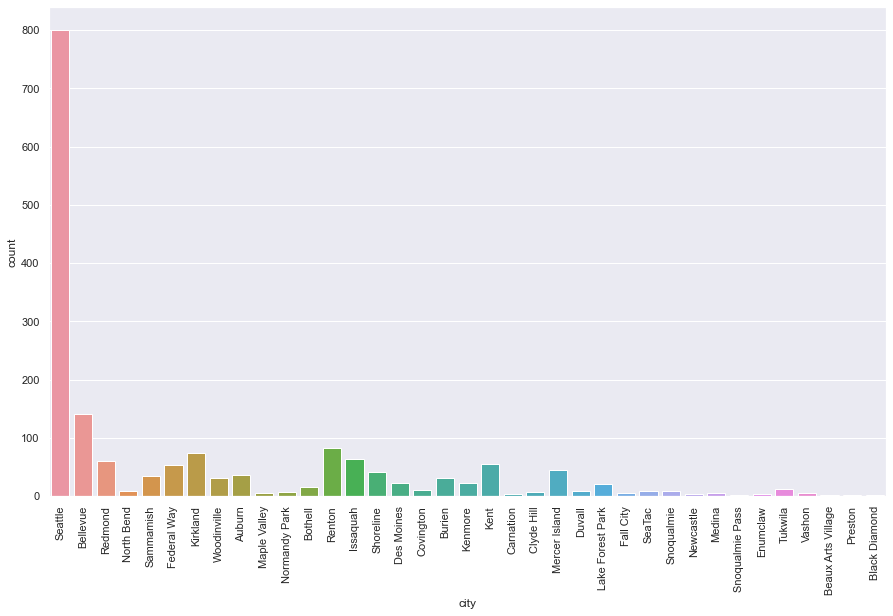

In [510]:
plt.figure(figsize=(15,9))
city_zip = sns.countplot(dff['city'])
city_zip.set_xticklabels(city_zip.get_xticklabels(), rotation=90)

In [114]:
dff['city'].value_counts()

Seattle               800
Bellevue              141
Renton                 82
Kirkland               74
Issaquah               64
Redmond                60
Kent                   55
Federal Way            54
Mercer Island          44
Shoreline              42
Auburn                 36
Sammamish              34
Woodinville            31
Burien                 31
Des Moines             23
Kenmore                22
Lake Forest Park       21
Bothell                15
Tukwila                12
Covington              11
North Bend              9
Snoqualmie              8
SeaTac                  8
Duvall                  8
Clyde Hill              7
Normandy Park           7
Maple Valley            6
Fall City               5
Medina                  5
Vashon                  5
Enumclaw                4
Newcastle               4
Carnation               4
Black Diamond           1
Beaux Arts Village      1
Snoqualmie Pass         1
Preston                 1
Name: city, dtype: int64

In [115]:
dff['statezip'].value_counts()

98115.0    79
98117.0    78
98006.0    64
98103.0    62
98027.0    54
           ..
98002.0     4
98014.0     4
98068.0     1
98050.0     1
98010.0     1
Name: statezip, Length: 73, dtype: int64

# Target Encoding On City

In [560]:
means = dff.groupby('city')['price'].mean()

dff['city_encoded'] = dff['city'].map(means)
dff.drop('city', axis = 1, inplace = True)
dff.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_basement,statezip,renov_age,city_encoded
1,1272500.0,5,2.50,9050.0,2.0,0,4,5,280.0,98119.0,0.0,632824.340022
3,420000.0,3,2.25,8030.0,1.0,0,0,4,1000.0,98008.0,0.0,801956.319149
4,550000.0,4,2.50,10500.0,1.0,0,0,4,800.0,98052.0,16.0,637316.466667
8,452500.0,3,2.50,20477.0,1.0,0,0,4,860.0,98045.0,0.0,447055.555556
11,1272500.0,4,2.50,4000.0,1.5,0,0,5,1010.0,98105.0,79.0,632824.340022


# Target Encoding on Statezip

In [561]:
means = dff.groupby('statezip')['price'].mean()

dff['state_encoded'] = dff['statezip'].map(means)
dff.drop('statezip', axis = 1, inplace = True)
dff.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_basement,renov_age,city_encoded,state_encoded
1,1272500.0,5,2.50,9050.0,2.0,0,4,5,280.0,0.0,632824.340022,905378.000000
3,420000.0,3,2.25,8030.0,1.0,0,0,4,1000.0,0.0,801956.319149,627541.666667
4,550000.0,4,2.50,10500.0,1.0,0,0,4,800.0,16.0,637316.466667,618856.897959
8,452500.0,3,2.50,20477.0,1.0,0,0,4,860.0,0.0,447055.555556,447055.555556
11,1272500.0,4,2.50,4000.0,1.5,0,0,5,1010.0,79.0,632824.340022,879707.559140


# One Hot Encoding On statezip

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder()
# transformed = ohe.fit_transform(df[['statezip']])
# df[ohe.categories_[0]] = transformed.toarray()
# df.drop('statezip', axis = 1, inplace = True)
# df.head()

# Normal distrubtion using Log

In [568]:
dff['price'] = np.log(dff['price'])

Skew :  0.9531026757864709


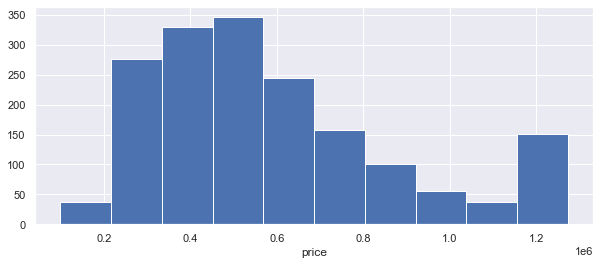

Skew :  0.9685967619964732


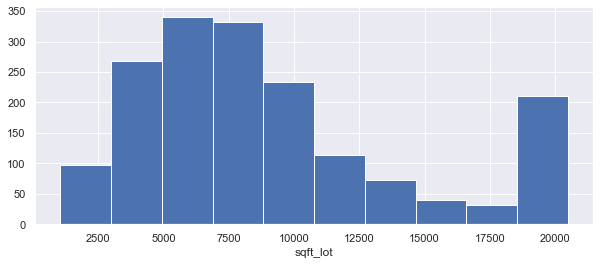

Skew :  0.4794628987546843


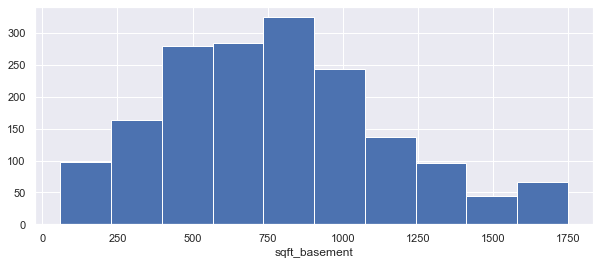

Skew :  0.1392485085886635


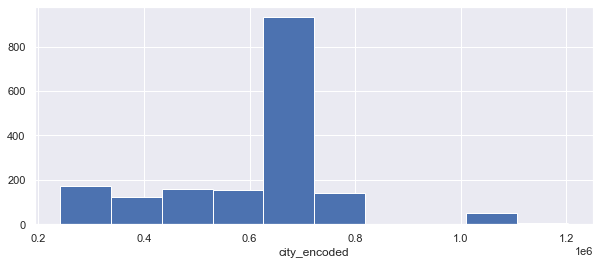

Skew :  0.44140917486961145


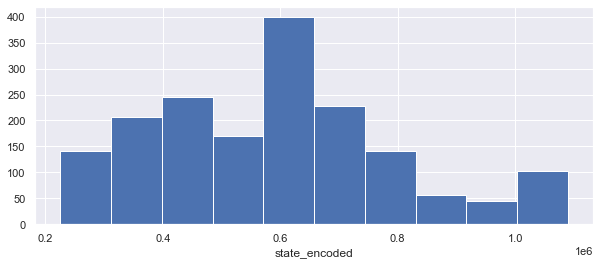

In [563]:
for i in dff[['price','sqft_lot','sqft_basement','city_encoded','state_encoded']]:
    dff[i].hist(figsize=(10,4))
    print('Skew : ', dff[i].skew())
    plt.xlabel(i)
    plt.show()

<AxesSubplot:xlabel='price', ylabel='Density'>

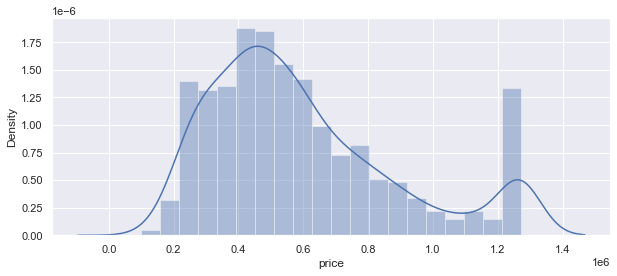

In [564]:
sns.distplot(dff['price'])

In [391]:
dff.describe()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_basement,renov_age,city_encoded,state_encoded
count,1.736000e+03,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1.736000e+03,1.736000e+03
mean,5.945792e+05,3.633065,2.295651,9125.782834,1.288594,0.009793,0.433756,3.620968,781.790899,19.858295,5.945792e+05,5.945792e+05
std,2.903940e+05,0.955874,0.810128,5325.392451,0.440339,0.098500,0.996935,0.742531,374.393772,26.198171,1.550358e+05,2.046698e+05
min,1.000000e+05,1.000000,0.750000,1060.000000,1.000000,0.000000,0.000000,1.000000,60.000000,0.000000,2.420318e+05,2.255500e+05
25%,3.850000e+05,3.000000,1.750000,5085.750000,1.000000,0.000000,0.000000,3.000000,500.000000,0.000000,4.849036e+05,4.581250e+05
50%,5.276000e+05,4.000000,2.250000,7730.000000,1.000000,0.000000,0.000000,3.000000,760.000000,0.000000,6.328243e+05,6.159707e+05
75%,7.400000e+05,4.000000,2.750000,11242.250000,1.500000,0.000000,0.000000,4.000000,1000.000000,41.000000,6.328243e+05,6.887791e+05
max,1.272500e+06,9.000000,8.000000,20477.000000,3.000000,1.000000,4.000000,5.000000,1750.000000,97.000000,1.202500e+06,1.089801e+06


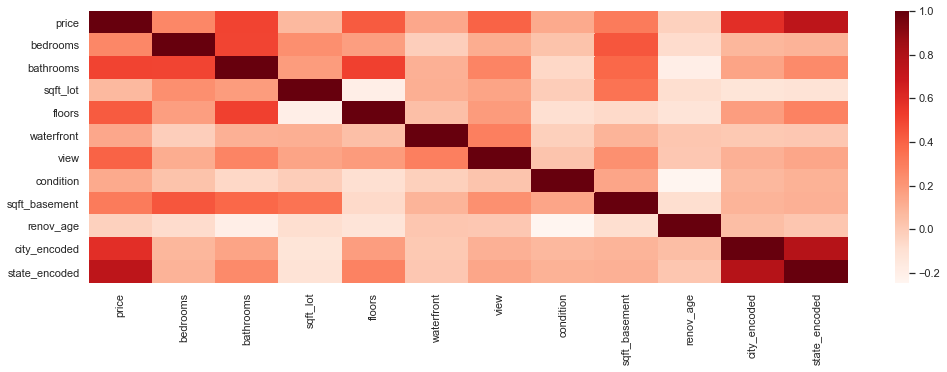

In [325]:
fig, ax = plt.subplots(figsize=(17,5))
sns.set(rc = {'figure.figsize':(10,4)})
sns.heatmap(dff.corr(),cmap='Reds',ax=ax)
plt.show()

# Modeling

In [565]:
X = dff.iloc[:,1:]

Y = dff.iloc[:,0]

In [566]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [567]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.3, random_state=42)
lr = XGBRegressor()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
print(f"r2 score :{r2_score(y_test, pred)}")
print(f"mean squared error : {mean_squared_error(y_test,pred)}")

r2 score :0.6987195090153713
mean squared error : 26711438531.61913
